<a href="https://colab.research.google.com/github/Vankum100/colabs/blob/neural-networks-miet/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 2 



In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Sigmoid function:

$$
\sigma = \frac{1}{1 + e^{-x}}
$$

$\sigma$ от (0, 1). когда $x$  < 0, $\sigma$ ~ 0.  когда $x$ > 0, $\sigma$ ~ 1.  B  $x=0$, $\sigma=0.5$

In [2]:
## sigmoid function
def sigmoid(x):
    """Sigmoid function"""
    return 1.0 / (1.0 + np.exp(-x))

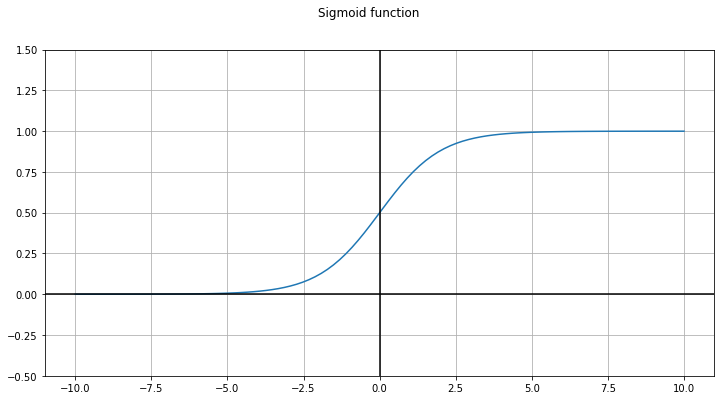

In [4]:
# Plot the sigmoid function
vals = np.linspace(-10, 10, num=100, dtype=np.float32)
activation = sigmoid(vals)
fig = plt.figure(figsize=(12,6))
fig.suptitle('Sigmoid function')
plt.plot(vals, activation)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks()
plt.ylim([-0.5, 1.5]);

### Реализация функции "ИЛИ" (англ. "OR")



### OR Gate

<table>

<tr>
<th colspan="3">OR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>



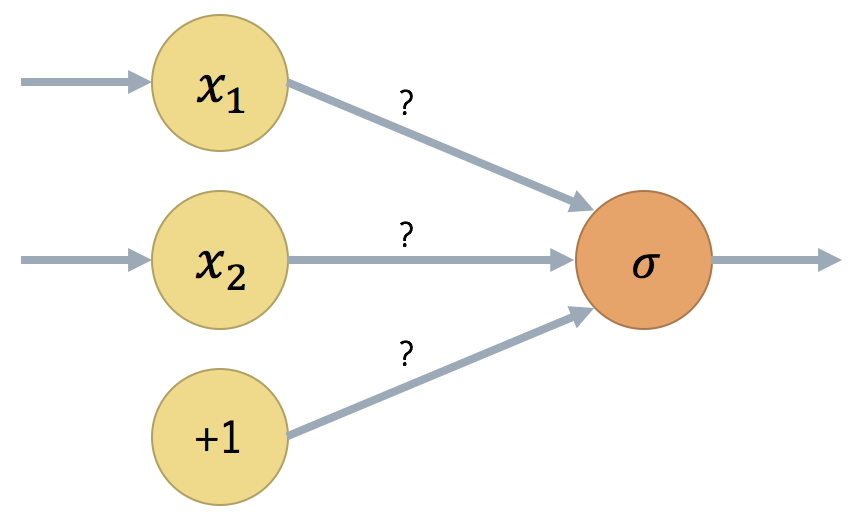



$$
z = w_1 x_1 + w_2 x_2 + b
$$




*  $w_1=20$, $w_2=20$, and $b=-10$!

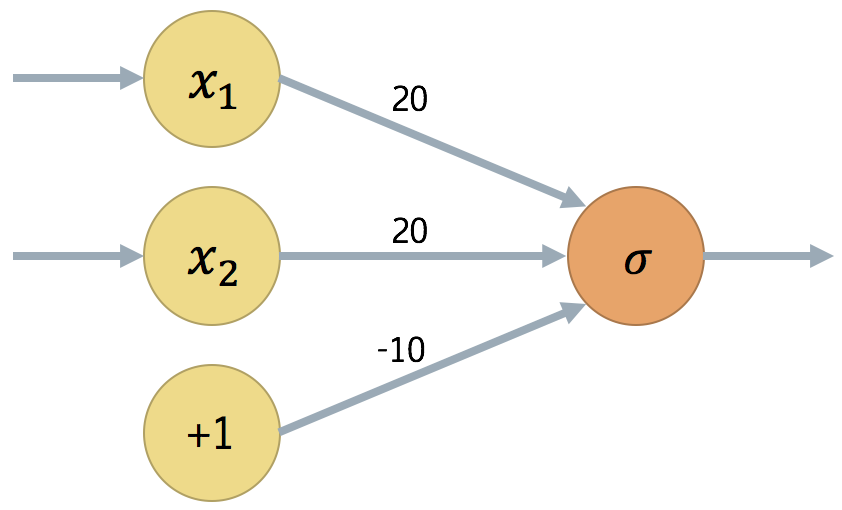

In [5]:
def logic_gate(w1, w2, b):
    
    # Plug in values for weight_a, weight_b, and bias
    return lambda x1, x2: sigmoid(w1 * x1 + w2 * x2 + b)

def test(gate):
    
    for a, b in (0, 0), (0, 1), (1, 0), (1, 1):
        print("{}, {}: {}".format(a, b, np.round(gate(a, b))))

In [6]:
or_gate = logic_gate(20, 20, -10)
test(or_gate)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 1.0


<table>

<tr>
<th colspan="3">OR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>



### Реализация функции "И" (англ. "AND")

<table>

<tr>
<th colspan="3">AND gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>

In [7]:

# the truth table matches

w1 = 11
w2 = 10
b = -20
and_gate = logic_gate(w1, w2, b)
### END SOLUTION
test(and_gate)

0, 0: 0.0
0, 1: 0.0
1, 0: 0.0
1, 1: 1.0


**Реализация функции "Исключающее ИЛИ" (англ. "XOR")**

### NAND (Not And) Gate  нужно для XOR
 
<table>

<tr>
<th colspan="3">NAND gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>0</td>
</tr>

</table>

In [8]:

# truth table matches
w1 = -11
w2 = -10
b = 20
nand_gate = logic_gate(w1, w2, b)


test(nand_gate)

0, 0: 1.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0




### XOR (Exclusive Or) Gate

<table>

<tr>
<th colspan="3">XOR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>0</td>
</tr>

</table>

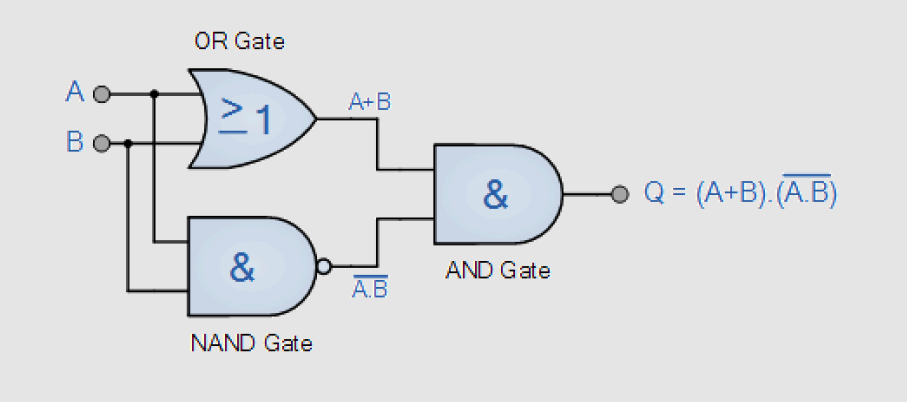
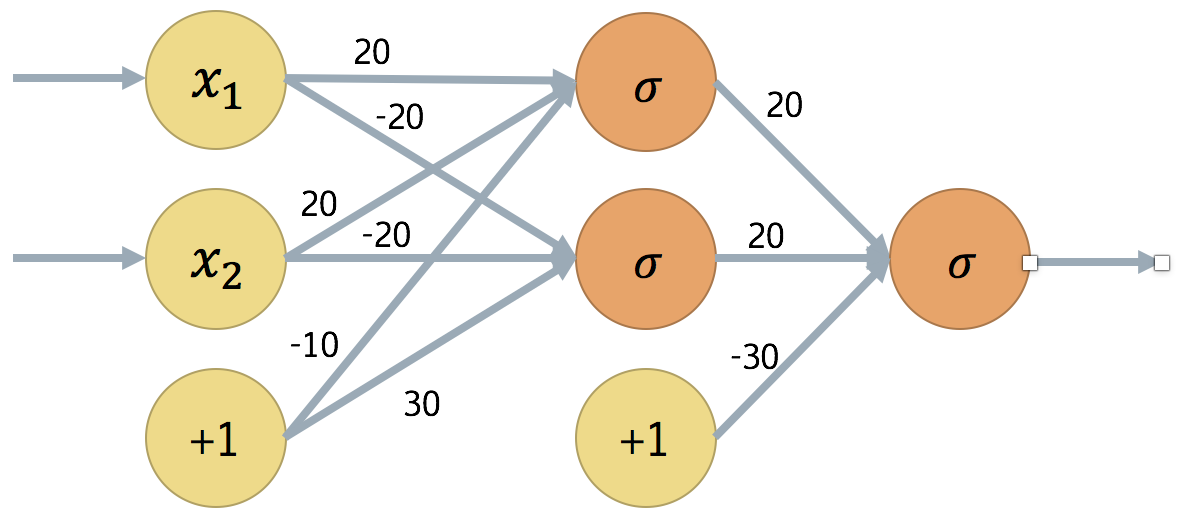



In [9]:
# or_gate, nand_gate, and and_gate 
def xor_gate(a, b):
    c = or_gate(a, b)
    d = nand_gate(a, b)
    return and_gate(c, d)
test(xor_gate)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0


# Реализация функции "ИЛИ" (англ. "OR") с использованием нейрона Мак-Каллока-Питтса

In [11]:
import numpy as np
# Задание весов и значения порога
print('Введите веса')
w1=float(input('Вес w1 ='))
w2=float(input('Вес w2 ='))
print('Введите величину порога')
theta=float(input('Порог ='))
y=np.array([0, 0, 0, 0])
x1=np.array([1, 1, 0, 0])
x2=np.array([1, 0, 1, 0])
z=np.array([1, 1, 1, 0])
con=1
while con != 0:
    zin=x1*w1+x2*w2
    for i in range(0,4):
        if zin[i]>=theta:
            y[i]=1
        else:
            y[i]=0
    print('Значение на выходе нейрона')
    print(y)
    if all(y==z):
        con=0
    else:
        print('Нейрон не обучен. Введите другие значения весовых коэффициентов и порога')
        w1=float(input('Вес w1 ='))
        w2=float(input('Вес w2 ='))
        theta=float(input('Порог ='))
print('Нейрон МакКаллока-Питса для функции "ИЛИ" (англ. "OR")')
print('Веса нейрона')
print(w1)
print(w2)
print('Пороговое значение')
print(theta)

Введите веса
Вес w1 =1
Вес w2 =1
Введите величину порога
Порог =0.5
Значение на выходе нейрона
[1 1 1 0]
Нейрон МакКаллока-Питса для функции "ИЛИ" (англ. "OR")
Веса нейрона
1.0
1.0
Пороговое значение
0.5






# Реализация функции "И" (англ. "AND") с использованием нейрона Мак-Каллока-Питтса

In [12]:
# Задание весов и значения порога
print('Введите веса')
w1=float(input('Вес w1 ='))
w2=float(input('Вес w2 ='))
print('Введите величину порога')
theta=float(input('Порог ='))
y=np.array([0, 0, 0, 0])
x1=np.array([1, 1, 0, 0])
x2=np.array([1, 0, 1, 0])
z=np.array([0, 0, 0, 1])
con=1
while con != 0:
    zin=x1*w1+x2*w2
    for i in range(0,4):
        if zin[i]>=theta:
            y[i]=0
        else:
            y[i]=1
    print('Значение на выходе нейрона')
    print(y)
    if all(y==z):
        con=0
    else:
        print('Нейрон не обучен. Введите другие значения весовых коэффициентов и порога')
        w1=float(input('Вес w1 ='))
        w2=float(input('Вес w2 ='))
        theta=float(input('Порог ='))
print('Нейрон МакКаллока-Питса для функции "И" (англ. "AND")')
print('Веса нейрона')
print(w1)
print(w2)
print('Пороговое значение')
print(theta)

Введите веса
Вес w1 =2
Вес w2 =2
Введите величину порога
Порог =1
Значение на выходе нейрона
[0 0 0 1]
Нейрон МакКаллока-Питса для функции "И" (англ. "AND")
Веса нейрона
2.0
2.0
Пороговое значение
1.0


# Реализация функции "И" (англ. "AND") с использованием нейрона Мак-Каллока-Питтса в биполярной логике

In [13]:
# Задание весов и значения порога
print('Введите веса')
w1=float(input('Вес w1 ='))
w2=float(input('Вес w2 ='))
print('Введите величину порога')
theta=float(input('Порог ='))
y=np.array([0, 0, 0, 0])
x1=np.array([1, 1, -1, -1])
x2=np.array([1, -1, 1, -1])
z=np.array([-1, -1, -1, 1])
con=1
while con != 0:
    zin=x1*w1+x2*w2
    for i in range(0,4):
        if zin[i]>=theta:
            y[i]=-1
        else:
            y[i]=1
    print('Значение на выходе нейрона')
    print(y)
    if all(y==z):
        con=0
    else:
        print('Нейрон не обучен. Введите другие значения весовых коэффициентов и порога')
        w1=float(input('Вес w1 ='))
        w2=float(input('Вес w2 ='))
        theta=float(input('Порог ='))
print('Нейрон МакКаллока-Питса для функции "И" (англ. "AND")');
print('Веса нейрона')
print(w1)
print(w2)
print('Пороговое значение')
print(theta)

Введите веса
Вес w1 =1
Вес w2 =1
Введите величину порога
Порог =-0.5
Значение на выходе нейрона
[-1 -1 -1  1]
Нейрон МакКаллока-Питса для функции "И" (англ. "AND")
Веса нейрона
1.0
1.0
Пороговое значение
-0.5


# Реализация функции "Исключающее ИЛИ" (англ. "XOR") с помощью 2-х слойного перцептрона

In [14]:
# Задание весов и значения порога
print('Введите веса')
w_11=float(input('Вес w_11 ='))
w_12=float(input('Вес w_12 ='))
w_21=float(input('Вес w_21 ='))
w_22=float(input('Вес w_22 ='))
w11=float(input('Вес w11 ='))
w12=float(input('Вес w12 ='))

print('Введите величину порога')
theta=float(input('Порог ='))
y=np.array([0, 0, 0, 0])
y1=np.array([0, 0, 0, 0])
y2=np.array([0, 0, 0, 0])
x1=np.array([1, 1, 0, 0])
x2=np.array([1, 0, 1, 0])
z=np.array([0, 1, 1, 0])
con=1
while con != 0:
    zin1=x1*w_11+x2*w_21
    zin2=x1*w_12+x2*w_22
    for i in range(0,4):
        if zin1[i]>=theta:
            y1[i]=1
        else:
            y1[i]=0
        if zin2[i]>=theta:
            y2[i]=1
        else:
            y2[i]=0
    zin = y1*w11 + y2*w12
    for i in range(0,4):
        if zin[i]>=theta:
            y[i]=1
        else:
            y[i]=0
    print('Значение на выходе нейрона')
    print(y)
    if all(y==z):
        con=0
    else:
        print('Нейрон не обучен. Введите другие значения весовых коэффициентов и порога')
        w_11=float(input('Вес w_11 ='))
        w_12=float(input('Вес w_12 ='))
        w_21=float(input('Вес w_21 ='))
        w_22=float(input('Вес w_22 ='))
        w11=float(input('Вес w11 ='))
        w12=float(input('Вес w12 ='))
print('Нейрон МакКаллока-Питса для функции "Исключащее-ИЛИ" (англ. "XOR")');
print('Веса первого слоя');
print( [w_11, 
        w_12,
        w_21,
        w_22] )
print('Веса второго слоя');
print( [w11, 
        w12] )
print('Пороговое значение')
print(theta)

Введите веса
Вес w_11 =2
Вес w_12 =-1.5
Вес w_21 =-1.5
Вес w_22 =2
Вес w11 =2
Вес w12 =2
Введите величину порога
Порог =1
Значение на выходе нейрона
[0 1 1 0]
Нейрон МакКаллока-Питса для функции "Исключащее-ИЛИ" (англ. "XOR")
Веса первого слоя
[2.0, -1.5, -1.5, 2.0]
Веса второго слоя
[2.0, 2.0]
Пороговое значение
1.0
